In [1]:
# import required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('Boston.csv')

In [3]:
# dataset
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std  

In [10]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    return outliers

outliers = detect_outliers_iqr(df)
print("Number of outliers in each numerical column:")
print(outliers)

Number of outliers in each numerical column:
{'Unnamed: 0': 0, 'crim': 66, 'zn': 68, 'indus': 0, 'chas': 35, 'nox': 0, 'rm': 30, 'age': 0, 'dis': 5, 'rad': 0, 'tax': 0, 'ptratio': 15, 'black': 77, 'lstat': 7, 'medv': 40}


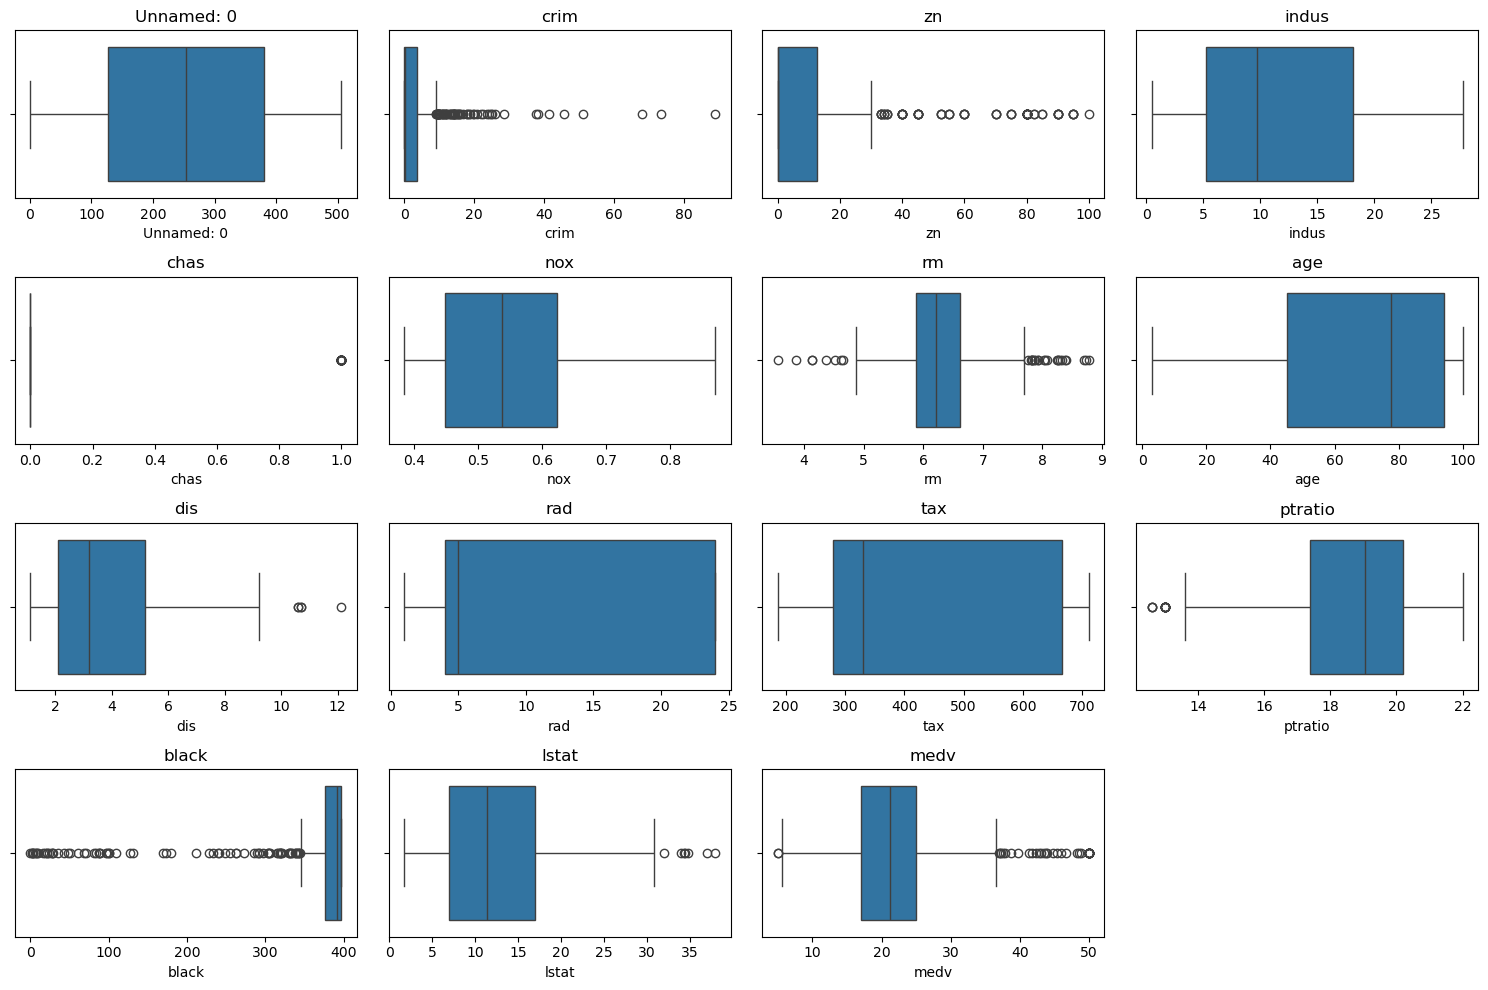

In [11]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [12]:
def remove_outliers_iqr(df):
    df_cleaned = df.copy()
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers
data_cleaned = remove_outliers_iqr(df)

# Print the shape of the original and cleaned data
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (506, 15)
Cleaned data shape: (268, 15)


C:\Users\acer\AppData\Local\Temp\ipykernel_59236\2375009063.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
C:\Users\acer\AppData\Local\Temp\ipykernel_59236\2375009063.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
C:\Users\acer\AppData\Local\Temp\ipykernel_59236\2375009063.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
C:\Users\acer\AppData\Local\Temp\ipykernel_59236\2375009063.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
C:\Users\acer\AppData\Local\Temp\ipykernel_59236\2375009063.py:10: UserWarning: Boolean 

In [13]:
# Check for remaining outliers in the cleaned data
outliers_cleaned = detect_outliers_iqr(data_cleaned)
print("Number of outliers in each numerical column (after cleaning):")
print(outliers_cleaned)

Number of outliers in each numerical column (after cleaning):
{'Unnamed: 0': 0, 'crim': 45, 'zn': 49, 'indus': 0, 'chas': 0, 'nox': 7, 'rm': 7, 'age': 0, 'dis': 0, 'rad': 35, 'tax': 38, 'ptratio': 0, 'black': 19, 'lstat': 9, 'medv': 14}


In [17]:
data_cleaned.shape

(268, 15)

In [15]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  268 non-null    int64  
 1   crim        268 non-null    float64
 2   zn          268 non-null    float64
 3   indus       268 non-null    float64
 4   chas        268 non-null    int64  
 5   nox         268 non-null    float64
 6   rm          268 non-null    float64
 7   age         268 non-null    float64
 8   dis         268 non-null    float64
 9   rad         268 non-null    int64  
 10  tax         268 non-null    int64  
 11  ptratio     268 non-null    float64
 12  black       268 non-null    float64
 13  lstat       268 non-null    float64
 14  medv        268 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 33.5 KB


In [18]:
df.to_csv('Boston_Cleaned.csv', index=False)